In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [13]:
data=load_iris()

In [14]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
# Create a DataFrame with just the features
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['target'] = data.target

# Display the first few rows of the DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


As discussed in voting since iris dataset easily gives 95 above accuracy we'll only use sepal width and sepal length and in target we'll only keep 

In [16]:
# Filter the DataFrame for target values 1 and 2
new_df = df[df['target'].isin([1, 2])]

# Select only the 'sepal length (cm)', 'sepal width (cm)', and 'target' columns
new_df = new_df[['sepal length (cm)', 'sepal width (cm)', 'target']]

In [17]:
new_df

,sepal length (cm),sepal width (cm),target
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

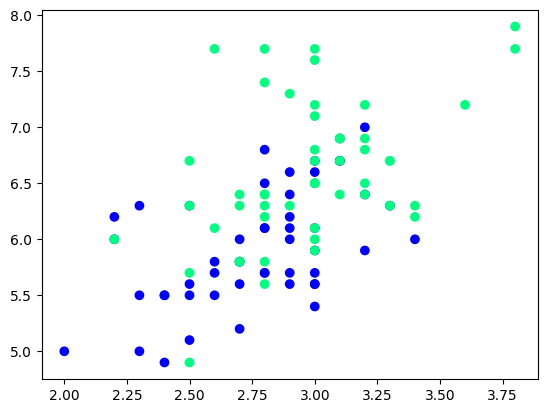

In [19]:
plt.scatter(new_df['sepal width (cm)'],new_df['sepal length (cm)'],c=new_df['target'],cmap='winter')

selecting small random data for train test and val

In [20]:
new_df=new_df.sample(100)
df_train=new_df.iloc[:60,:].sample(10)
df_val=new_df.iloc[60:80,:].sample(5)
df_test=new_df.iloc[80:,:].sample(5)

In [22]:
df_train

,sepal length (cm),sepal width (cm),target
84,5.4,3.0,1
88,5.6,3.0,1
73,6.1,2.8,1
91,6.1,3.0,1
140,6.7,3.1,2
97,6.2,2.9,1
118,7.7,2.6,2
99,5.7,2.8,1
145,6.7,3.0,2
90,5.5,2.6,1


In [23]:
X_test=df_val.drop(columns=['target'])
y_test=df_val['target']

In [25]:
y_test

55     1
95     1
56     1
51     1
138    2
Name: target, dtype: int64

Case 1- Bagging

for each decision tree we'll give 80 % of total training data ie 8


In [26]:
#Data for Tree 1
df_bag=df_train.sample(8,replace=True)
df_bag

,sepal length (cm),sepal width (cm),target
90,5.5,2.6,1
99,5.7,2.8,1
91,6.1,3.0,1
99,5.7,2.8,1
90,5.5,2.6,1
91,6.1,3.0,1
88,5.6,3.0,1
97,6.2,2.9,1


In [40]:
X=df_bag.drop(columns=['target'])
y=df_bag['target']

In [48]:
y

90    1
99    1
91    1
99    1
90    1
91    1
88    1
97    1
Name: target, dtype: int64

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [44]:
dt_bag1=DecisionTreeClassifier()

In [46]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

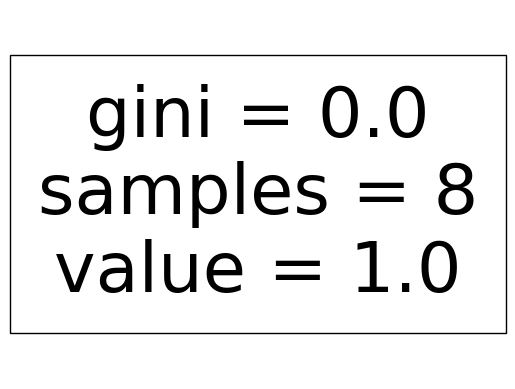

c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


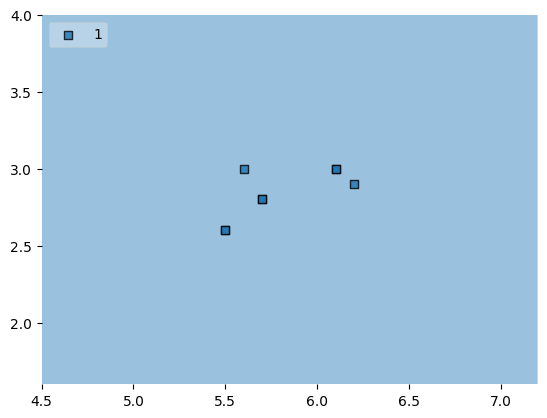

In [47]:
evaluate(dt_bag1,X,y)

In [49]:
#Data for Tree 2
df_bag=df_train.sample(8,replace=True)
X=df_bag.drop(columns=['target'])
y=df_bag['target']
df_bag

,sepal length (cm),sepal width (cm),target
91,6.1,3.0,1
118,7.7,2.6,2
145,6.7,3.0,2
97,6.2,2.9,1
145,6.7,3.0,2
145,6.7,3.0,2
91,6.1,3.0,1
90,5.5,2.6,1


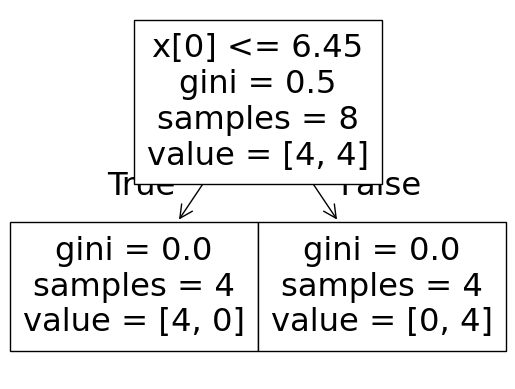

0.8


c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


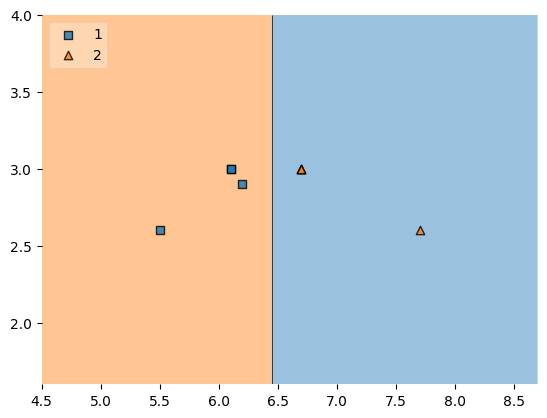

In [50]:
dt_bag2=DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [51]:
#Data for Tree 3
df_bag=df_train.sample(8,replace=True)
X=df_bag.drop(columns=['target'])
y=df_bag['target']
df_bag

,sepal length (cm),sepal width (cm),target
88,5.6,3.0,1
97,6.2,2.9,1
88,5.6,3.0,1
140,6.7,3.1,2
91,6.1,3.0,1
118,7.7,2.6,2
97,6.2,2.9,1
84,5.4,3.0,1


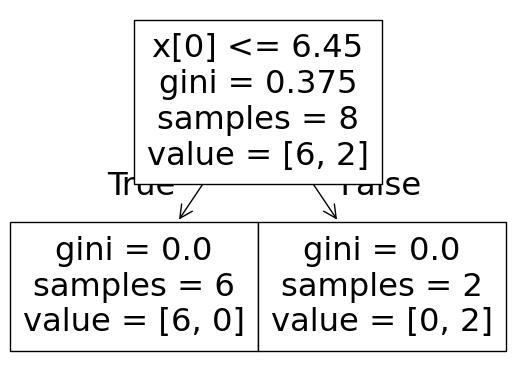

c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


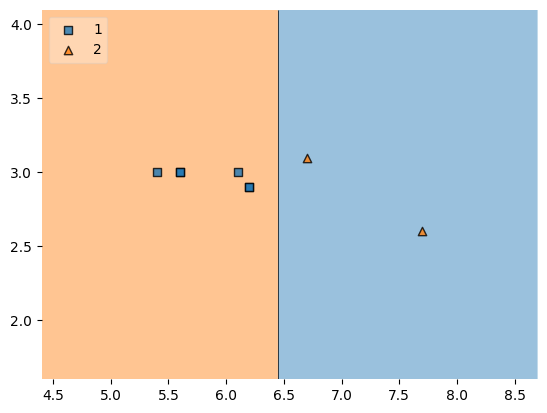

In [52]:
dt_bag3=DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

Aggregation(prediction)

In [53]:
df_test

,sepal length (cm),sepal width (cm),target
77,6.7,3.0,1
67,5.8,2.7,1
74,6.4,2.9,1
132,6.4,2.8,2
146,6.3,2.5,2


In [58]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [60]:
print("Predictor 1 ",dt_bag1.predict(np.array([6.4,2.8]).reshape(1,2)))
print("Predictor 2 ",dt_bag2.predict(np.array([6.4,2.8]).reshape(1,2)))
print("Predictor 3 ",dt_bag3.predict(np.array([6.4,2.8]).reshape(1,2)))

Predictor 1  [1]
Predictor 2  [1]
Predictor 3  [1]
